In [4]:
from matplotlib.image import imread # to load the image
import matplotlib.pyplot as plt
import numpy as np
import os

In [12]:
plt.rcParams['figure.figsize'] = [5,5] #declaring the size of the image to plot
image = imread("image.png") #imread converts the original image to numpy array

In [13]:
X = np.mean(image, -1); #convert RGB to Grayscale
print(X.shape) #to check the original image shape

(1024, 1024)


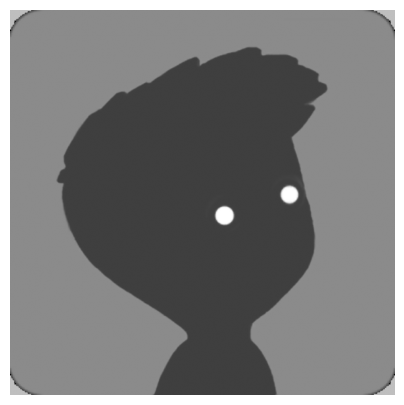

In [14]:
img = plt.imshow(X)
img.set_cmap('gray') #simply just changing the BG
plt.axis('off')
plt.show()

In [15]:
U, S, VT = np.linalg.svd(X, full_matrices = False) #camputuring the singular values and left and right singular vector

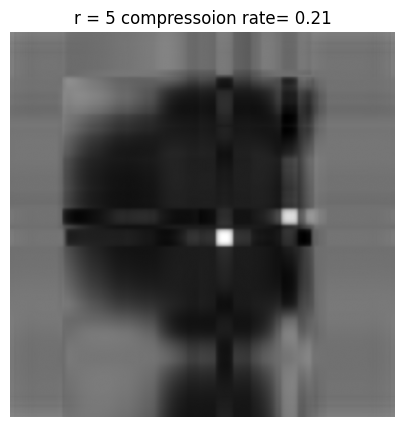

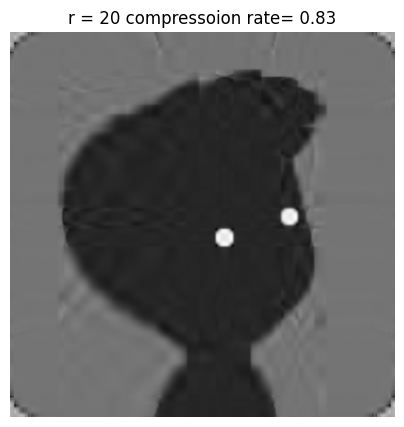

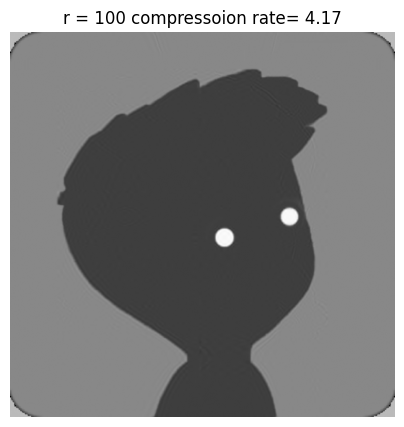

In [ ]:
S = np.diag(S)

j = 0
row=4000
col=6000
for r in (5, 20, 100):
    Xapprox = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
    plt.figure(j+1)
    j += 1
    original_size = row*col
    compressedSize = r * (1 + row+col)
    compression_ratio = compressedSize*1.0/ original_size
    img = plt.imshow(Xapprox)
    plt.title('r = {} compressoion rate= {}'.format(r,round(compression_ratio*100,2)))
    img.set_cmap('gray')
    plt.axis('off')
    plt.show()

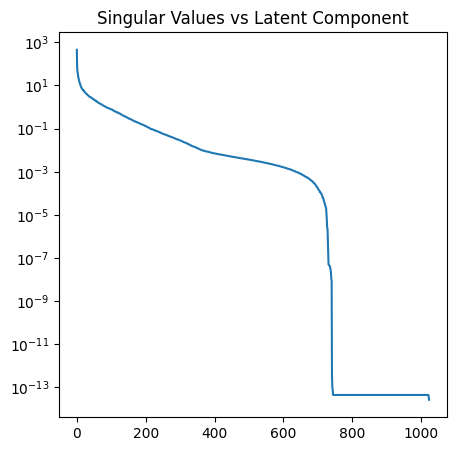

In [17]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values vs Latent Component')
plt.show()

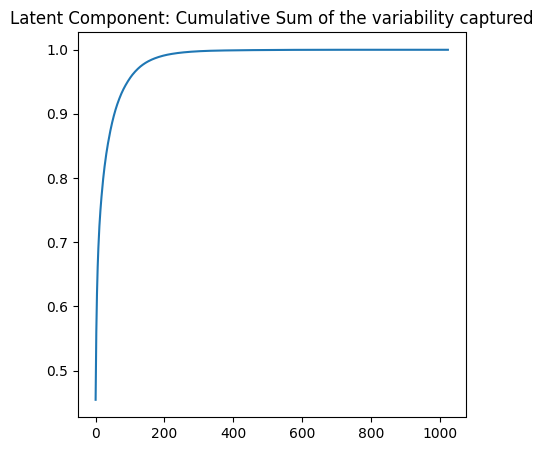

In [18]:
plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title("Latent Component: Cumulative Sum of the variability captured")
plt.show()